In [1]:
# Dependencies - import all the classes and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import os
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from Twitter import consumer_key, consumer_secret, access_token, access_token_secret
# It is best practice to hide your keys and not include them in the source code directly


# Setup Tweepy API Authentication - This the syntax for Tweepy - in the source website
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
tweepy_api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Setup Target Account Users
# Per Homework assignment the 5 news sources are CNN, BBC, CBS, FoxNews and NYTimes
# Below, we are creating a list (an array) with the corresponding twitter handles for the 5 news sources mentioned above
target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"] 

# Variables for holding sentiments
# Initializing new variable (dictionary) - sentiments, which will become our dictionary to store API responses
# and mainly our calculations from API data and Sentiment Analyzer Data
sentiments = []
tweets = []


for target_user in target_users:
    # Counter
    counter = 1


    # Loop through 5 pages of tweets (total 100 tweets - there are 20 tweets per page based on tweety API)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = tweepy_api.user_timeline(target_user, page = x+1) # Tushaar modified code - to parse through pages properly

        # Loop through all tweets 
        for tweet in public_tweets: # Define a variable tweet to go through each item in public_tweets for analyzing each tweet's sentiment
                                    # by using sentiment analyzer

            # Print Tweets
            # print("Tweet %s: %s" % (counter, tweet["text"])) # This is to print tweet output, which has been commented out

            # Run Vader Analysis on each tweet - the below syntax is a part of the Vader Analysis code, with inputs being passed
            # from twitter responses of each tweet (tweet["text"])
            compound = analyzer.polarity_scores(tweet["text"])["compound"] # Calculate compound score
            pos = analyzer.polarity_scores(tweet["text"])["pos"] # Calculate positive score
            neu = analyzer.polarity_scores(tweet["text"])["neu"] # Calculate neutral score
            neg = analyzer.polarity_scores(tweet["text"])["neg"] # Calculate negative score
            tweets_ago = counter # Set tweets_ago as a counter
            tweets = ("Tweet %s: %s" % (counter, tweet["text"])) # return the actual tweet
            

            # Add sentiments for each tweet into an array dictionary (include tweet count and the actual tweet as well)
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                               "News Agency": target_user,
                               "Tweet": tweets   
                              },
                              )
            # Add to counter 
            counter = counter + 1 # To calculate the number of each tweet

print ("Core engine calculations are complete and sentiments dictionary has been updated!")
print ("We have leveraged 100 tweets per each news agency (500 tweets total)")

Core engine calculations are complete and sentiments dictionary has been updated!
We have leveraged 100 tweets per each news agency (500 tweets total)


In [3]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["News Agency", "Tweets Ago", "Date", "Compound","Positive", "Negative", "Neutral", "Tweet"]]
sentiments_df.head()

,News Agency,Tweets Ago,Date,Compound,Positive,Negative,Neutral,Tweet
0,@BBC,1,Sat Mar 31 13:01:05 +0000 2018,0.1280,0.185,0.662,0.152,Tweet 1: 😂 True or false? \n@NiallOfficial scr...
1,@BBC,2,Sat Mar 31 12:31:02 +0000 2018,0.0000,0.000,1.000,0.000,Tweet 2: This is what happens when you get an ...
2,@BBC,3,Sat Mar 31 11:50:05 +0000 2018,-0.3404,0.000,0.821,0.179,Tweet 3: ✊ Don't like plastic in the supermark...
3,@BBC,4,Sat Mar 31 11:28:03 +0000 2018,0.1779,0.362,0.638,0.000,Tweet 4: It's still growing 😱 https://t.co/T5Y...
4,@BBC,5,Sat Mar 31 11:26:30 +0000 2018,-0.6351,0.000,0.820,0.180,Tweet 5: RT @BBCArchive: Eh-oh! #OnThisDay 199...


In [4]:
# Exporting the dataframe to a CSV
sentiments_df.to_csv("news_sentiments.csv", index = False)

In [5]:
# Now creating 5 Dataframes - One for each News Outlet, by using Loc function to split each dataframe by News Agency

cnn_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@CNN"]
bbc_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@BBC"]
cbs_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@CBS"]
foxnews_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@FoxNews"]
nytimes_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@nytimes"]

In [6]:
# Now calculating compound aggregates (sum/100 for 100 tweets per each news outlet). This is required for the
# bar chart of the homework

cnn_compound_aggregate = round((cnn_sentiments_df["Compound"].mean()),2)
bbc_compound_aggregate = round((bbc_sentiments_df["Compound"].mean()),2)
cbs_compound_aggregate = round((cbs_sentiments_df["Compound"].mean()),2)
foxnews_compound_aggregate = round((foxnews_sentiments_df["Compound"].mean()),2)
nytimes_compound_aggregate = round((nytimes_sentiments_df["Compound"].mean()),2)

# Printing the results, just for verification purpose
print (cnn_compound_aggregate)
print (bbc_compound_aggregate)
print (cbs_compound_aggregate)
print (foxnews_compound_aggregate)
print (nytimes_compound_aggregate)

-0.03
0.06
0.35
-0.05
0.01


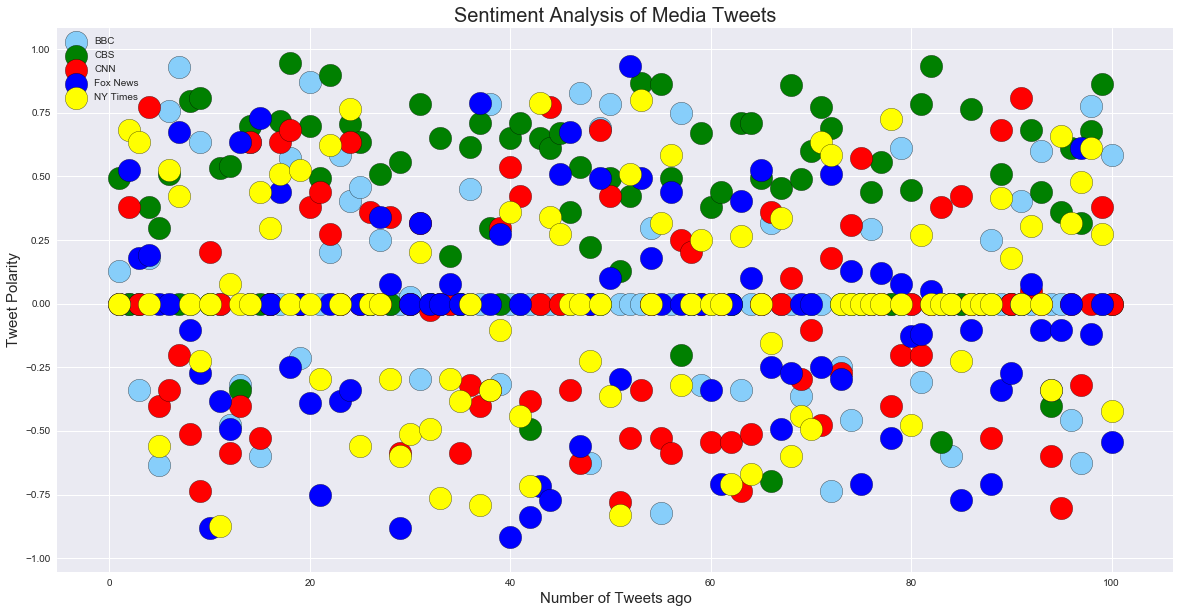

In [7]:
# Now creating the code for different charts

# Use Seaborn
sns.set()

# First create the main plot where we start with BBC tweets
main_plot = bbc_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', 
                         y= "Compound", color = "lightskyblue",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "BBC", s = 500
                     )

# Now we append CBS Tweets

cbs_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "green",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "CBS", s = 500, ax = main_plot )

# Now we append CNN Tweets

cnn_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "red",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "CNN", s = 500, ax = main_plot )


# Now we append Fox News Tweets

foxnews_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "blue",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "Fox News", s = 500, ax = main_plot )


# Now we append NY Times Tweets

nytimes_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "yellow",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "NY Times", s =500, ax = main_plot )


# Printing the labels and titles with their respective font sizes
plt.xlabel('Number of Tweets ago', fontsize = 15)
plt.ylabel("Tweet Polarity", fontsize = 15)
plt.title("Sentiment Analysis of Media Tweets", fontsize = 20)

# Saving the Image
plt.savefig("Tushaar_Sentiment_Analysis.png") # saving the graph as a .png image



# Showing the plot
plt.show()

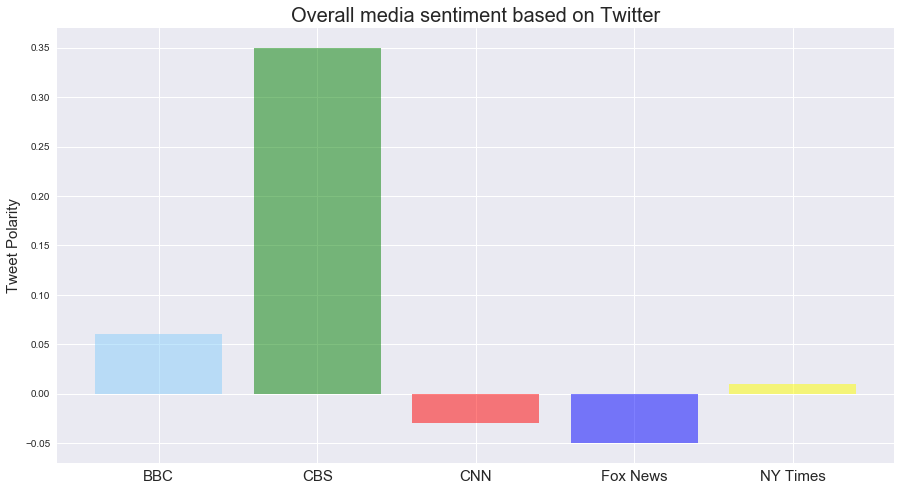

In [9]:
# Now creating the code for the bar chart

channels = [bbc_compound_aggregate, cbs_compound_aggregate, cnn_compound_aggregate, foxnews_compound_aggregate, nytimes_compound_aggregate]
x_axis = np.arange(len(channels))

# Tell matplotlib that we will be making a bar chart
# Channels is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks, and we assign respective colors
plt.bar(x_axis, channels, color=['lightskyblue', 'green', 'red', 'blue', 'yellow'], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox News", "NY Times"], fontsize = 15)

# Give our chart Y Label and Title
plt.title("Overall media sentiment based on Twitter", fontsize = 20)
plt.ylabel("Tweet Polarity", fontsize = 15)

# Code for increasing fig size for prettier looks :)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

# Saving the Image
plt.savefig("Tushaar_Overall_Media_Sentiment.png") # saving the graph as a .png image

# Showing the plot
plt.show()

